In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import Image
from tensorflow import keras

In [6]:
train_dir = '/Users/dyy/Desktop/CrackData/train/'
test_dir = '/Users/dyy/Desktop/CrackData/test/'
val_dir ='/Users/dyy/Desktop/CrackData/validation/'

In [7]:
def process_image(image):
    ret,bi_inv = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    #plt.imshow(bi_inv, 'gray')
    return bi_inv, image

def create_data(tdir_, type_, frm, to, t_data):
    colored_data=[]
    bi_inv_data=[]
    print('Working On '+t_data+' Data : '+type_ +'\n')
    rng = ["%05d" % x for x in range(frm, to+1)]
    for i in rng:
        dir_ =tdir_+type_+'/'+i+'.jpg'
        image = cv2.imread(dir_, 0)
        bi_inv, colored_img = process_image(image)
        colored_data.append(colored_img)
        bi_inv_data.append(bi_inv)   
        
    print('Images Processed from '+rng[0]+' to '+rng[len(rng)-1]+'\n')    
    return colored_data, bi_inv_data

In [8]:
train_data_colr= []
train_labels=[]
train_data_inv = []

train_data_colr_pos, train_data_inv_pos=  create_data(train_dir, 'Positive', 1, 3000, 'Training')

for i in range(0, len(train_data_colr_pos)):
    train_data_colr.append(train_data_colr_pos[i])
    train_data_inv.append(train_data_inv_pos[i])
    train_labels.append(1)

train_data_colr_neg, train_data_inv_neg=  create_data(train_dir, 'Negative', 1, 3000, 'Training')

for i in range(0, len(train_data_colr_neg)):
    train_data_colr.append(train_data_colr_neg[i])
    train_data_inv.append(train_data_inv_neg[i])
    train_labels.append(0)
    

final_train_colr = np.array(train_data_colr).reshape(((len(train_data_colr), 227, 227, 1)))        
final_train_inv = np.array(train_data_inv).reshape(((len(train_data_inv), 227, 227, 1)))   

print('Shape of Training Data : '+str(final_train_colr.shape))    

Working On Training Data : Positive

Images Processed from 00001 to 03000

Working On Training Data : Negative

Images Processed from 00001 to 03000

Shape of Training Data : (6000, 227, 227, 1)


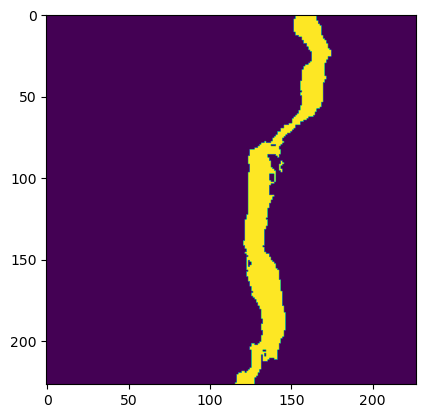

In [9]:
plt.imshow(train_data_inv_pos[8])

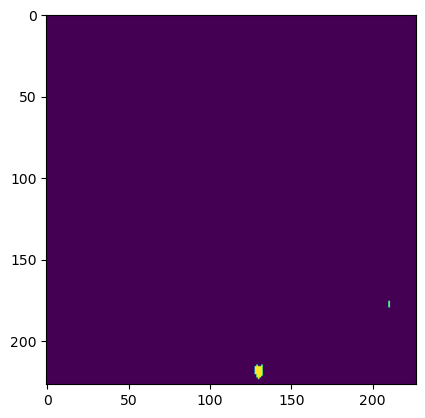

In [10]:
plt.imshow(train_data_inv_neg[8])

In [11]:
val_data_colr= []
val_labels=[]
val_data_inv = []

val_data_colr_pos, val_data_inv_pos=  create_data(val_dir, 'positive', 3001, 3600, 'Validation')


for i in range(0, len(val_data_colr_pos)):
    val_data_colr.append(val_data_colr_pos[i])
    val_data_inv.append(val_data_inv_pos[i])
    val_labels.append(1)

val_data_colr_neg, val_data_inv_neg=  create_data(val_dir, 'negative', 3001, 3600, 'Validation')

for i in range(0, len(val_data_colr_neg)):
    val_data_colr.append(val_data_colr_neg[i])
    val_data_inv.append(val_data_inv_neg[i])
    val_labels.append(0)
    
final_val_colr = np.array(val_data_colr).reshape(((len(val_data_colr), 227, 227, 1)))    
final_val_inv = np.array(val_data_inv).reshape(((len(val_data_inv), 227, 227, 1)))   

print('Shape of Validation Data : '+str(final_val_colr.shape))

Working On Validation Data : positive

Images Processed from 03001 to 03600

Working On Validation Data : negative

Images Processed from 03001 to 03600

Shape of Validation Data : (1200, 227, 227, 1)


In [12]:
test_data_colr= []
test_labels=[]
test_data_inv = []

test_data_colr_pos, test_data_inv_pos=  create_data(test_dir, 'positive', 3601, 4000, 'Testing')


for i in range(0, len(test_data_colr_pos)):
    test_data_colr.append(test_data_colr_pos[i])
    test_data_inv.append(test_data_inv_pos[i])
    test_labels.append(1)

test_data_colr_neg, test_data_inv_neg=  create_data(test_dir, 'negative', 3601, 4000, 'Testing')

for i in range(0, len(test_data_colr_neg)):
    test_data_colr.append(test_data_colr_neg[i])
    test_data_inv.append(test_data_inv_neg[i])
    test_labels.append(0)
    
final_test_colr = np.array(test_data_colr).reshape(((len(test_data_colr), 227, 227, 1)))    
final_test_inv = np.array(test_data_inv).reshape(((len(test_data_inv), 227, 227, 1)))   

print('Shape of Testing Data : '+str(final_test_colr.shape))

Working On Testing Data : positive

Images Processed from 03601 to 04000

Working On Testing Data : negative

Images Processed from 03601 to 04000

Shape of Testing Data : (800, 227, 227, 1)


In [21]:
train_labels_array = np.array(train_labels)
val_labels_array = np.array(val_labels)
test_labels_array = np.array(test_labels)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model

In [15]:
input_shape = (227, 227, 1)
Wh = 3
Ww = 3

In [16]:
model = Sequential()
model.add(Conv2D(input_shape=input_shape , data_format="channels_last", kernel_size=(Wh,Ww), filters=32, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [17]:
batch_size = 250
epochs = 30

In [18]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(final_train_inv, train_labels_array, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(final_val_inv, val_labels_array))

Epoch 1/30
24/24 [==============================] - 994s 41s/step - loss: 13.2752 - accuracy: 0.7660 - val_loss: 0.3500 - val_accuracy: 0.8883
Epoch 2/30
24/24 [==============================] - 1302s 54s/step - loss: 0.3830 - accuracy: 0.8672 - val_loss: 0.4514 - val_accuracy: 0.9150
Epoch 3/30
24/24 [==============================] - 833s 34s/step - loss: 0.2674 - accuracy: 0.9010 - val_loss: 0.7663 - val_accuracy: 0.8408
Epoch 4/30
24/24 [==============================] - 763s 32s/step - loss: 0.2062 - accuracy: 0.9157 - val_loss: 0.1381 - val_accuracy: 0.9508
Epoch 5/30
24/24 [==============================] - 727s 30s/step - loss: 0.1416 - accuracy: 0.9410 - val_loss: 0.1304 - val_accuracy: 0.9525
Epoch 6/30
24/24 [==============================] - 736s 31s/step - loss: 0.1270 - accuracy: 0.9480 - val_loss: 0.1206 - val_accuracy: 0.9492
Epoch 7/30
24/24 [==============================] - 785s 33s/step - loss: 0.0997 - accuracy: 0.9662 - val_loss: 0.0875 - val_accuracy: 0.9658
Epoc

In [23]:
score=model.evaluate(final_test_inv, test_labels_array)
print('Final Accuracy : ', score[1]*100, "%" )
print('Final Loss : ', score[0])

25/25 [==============================] - 8s 323ms/step - loss: 0.2267 - accuracy: 0.9675
Final Accuracy :  96.74999713897705 %
Final Loss :  0.226725772023201


In [48]:
model.save('autodetect.keras')